# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Testing citipy modul
city1 = citipy.nearest_city(22.99, 120.21)
print(city1)
print(city1.city_name)
print(city1.country_code)
# print(weather_api_key)

tainan
tw


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[0:10])


614
['kapaa', 'albany', 'mys shmidta', 'lumphat', 'rikitea', 'ushuaia', 'port hardy', 'ponta do sol', 'khatanga', 'atuona']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).




In [187]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [203]:
# set up lists to hold reponse info
city_data = []
cloudiness = []
country = []
date = []
humidity =[]
lat = []
lng = []
max_temp = []
wind_speed =[]
count = 0
count_error = 0


# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    response = requests.get(query_url + city).json()
    try:
#         pprint(response)
#         print('==============')
        
        city_data_v = (response['name'])
        country_v = (response['sys']['country'])
        cloudiness_v = (response['clouds']['all'])
        date_v = (response['dt'])
        humidity_v = (response['main']['humidity'])
        lat_v = (response['coord']['lat'])
        lng_v =(response['coord']['lon'])
        max_temp_v = (response['main']['temp_max'])
        wind_speed_v = (response['wind']['speed'])
        
        city_data.append(city_data_v)
        country.append(country_v)
        cloudiness.append(cloudiness_v)
        date.append(date_v)
        humidity.append(humidity_v)
        lat.append(lat_v)
        lng.append(lng_v)
        max_temp.append(max_temp_v)
        wind_speed.append(wind_speed_v)
        count +=1
        print(f"City number: {count},  city name: {city_data_v}")
        
        
    except (KeyError, IndexError):
        count_error +=1
        print(f"Missing field/result... skipping. {count_error}") 
        
print(f"Total results :{count} cities")        
print(f"Missing field/result:{count_error} errors") 
        
# print(f"city: {city_data}" )
# print(f"country: {country}")
# print(f"cloudiness: {cloudiness}")
# print(f"date: {date}")
# print(f"humidity: {humidity}")
# print(f"lat: {lat}")
# print(f"lng: {lng}")
# print(f"max_temp: {max_temp}")
# print(f"wind_speed: {wind_speed}")

City number: 1,  city name: Rikitea
City number: 2,  city name: Ushuaia
City number: 3,  city name: Saint-Augustin
City number: 4,  city name: Carnarvon
City number: 5,  city name: Along
Missing field/result... skipping. 1
Missing field/result... skipping. 2
City number: 6,  city name: Los Llanos de Aridane
City number: 7,  city name: Carutapera
City number: 8,  city name: Kiryat Gat
City number: 9,  city name: Hithadhoo
City number: 10,  city name: Shingu
Missing field/result... skipping. 3
City number: 11,  city name: Dunedin
City number: 12,  city name: Jamestown
City number: 13,  city name: Bengkulu
City number: 14,  city name: Dikson
City number: 15,  city name: Mataura
City number: 16,  city name: Laas
Missing field/result... skipping. 4
City number: 17,  city name: College
City number: 18,  city name: Punta Arenas
Missing field/result... skipping. 5
City number: 19,  city name: Mossamedes
City number: 20,  city name: Oksfjord
City number: 21,  city name: Lagoa
City number: 22,  

City number: 188,  city name: Yilan
City number: 189,  city name: Tura
City number: 190,  city name: Verkhnetulomskiy
City number: 191,  city name: Robertsport
City number: 192,  city name: Acapulco de Juarez
City number: 193,  city name: Maryville
Missing field/result... skipping. 28
City number: 194,  city name: Elko
City number: 195,  city name: Cabo San Lucas
City number: 196,  city name: Christchurch
City number: 197,  city name: Nanortalik
City number: 198,  city name: Zabid
City number: 199,  city name: Pevek
City number: 200,  city name: Pangnirtung
City number: 201,  city name: Quatre Cocos
City number: 202,  city name: Vila Franca do Campo
City number: 203,  city name: Lumphat
City number: 204,  city name: Sompeta
City number: 205,  city name: Port Lincoln
City number: 206,  city name: Inhambane
City number: 207,  city name: Chokurdakh
City number: 208,  city name: Husavik
City number: 209,  city name: Nome
City number: 210,  city name: Paita
City number: 211,  city name: Dev

City number: 382,  city name: Doka
City number: 383,  city name: Dongsheng
City number: 384,  city name: Orel-Izumrud
City number: 385,  city name: Palmer
City number: 386,  city name: Kostroma
City number: 387,  city name: Waitati
City number: 388,  city name: Hong Kong
City number: 389,  city name: Abu Samrah
City number: 390,  city name: Saint-Francois
Missing field/result... skipping. 41
City number: 391,  city name: Dickinson
City number: 392,  city name: Mahebourg
Missing field/result... skipping. 42
Missing field/result... skipping. 43
City number: 393,  city name: Gamba
City number: 394,  city name: Luderitz
City number: 395,  city name: Hall
City number: 396,  city name: Jijiga
City number: 397,  city name: Lida
City number: 398,  city name: Vilhena
City number: 399,  city name: Torit
City number: 400,  city name: Bardiyah
City number: 401,  city name: Great Falls
Missing field/result... skipping. 44
City number: 402,  city name: Moussoro
City number: 403,  city name: Hengshui

In [205]:

print(f"city: {len(city_data)}" )
print(f"country: {len(country)}")
print(f"cloudiness: {len(cloudiness)}")
print(f"date: {len(date)}")
print(f"humidity: {len(humidity)}")
print(f"lat: {len(lat)}")
print(f"lng: {len(lng)}")
print(f"max_temp: {len(max_temp)}")
print(f"wind_speed: {len(wind_speed)}")


city: 557
country: 557
cloudiness: 557
date: 557
humidity: 557
lat: 557
lng: 557
max_temp: 557
wind_speed: 557


In [206]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_data,
    "Country" :  country,    
    "Cloudiness": cloudiness,
    "Date":  date,
    "Humidity" : humidity,  
    "Lat" : lat,
    "Lng": lng,
    "Max Temp" :  max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
print(weather_data.count())
weather_data.head()

City          557
Country       557
Cloudiness    557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64


,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,PF,22,1579934964,77,-23.12,-134.97,78.35,14.85
1,Ushuaia,AR,75,1579935224,93,-54.80,-68.30,46.40,3.02
2,Saint-Augustin,CA,6,1579935260,74,51.23,-58.65,4.91,10.83
3,Carnarvon,AU,0,1579934968,62,-24.87,113.63,87.80,21.92
4,Along,IN,0,1579935260,33,28.17,94.77,63.82,1.48


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [207]:
weather_data.to_csv('output.csv')


In [208]:
weather_data.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,PF,22,1579934964,77,-23.12,-134.97,78.35,14.85
1,Ushuaia,AR,75,1579935224,93,-54.80,-68.30,46.40,3.02
2,Saint-Augustin,CA,6,1579935260,74,51.23,-58.65,4.91,10.83
3,Carnarvon,AU,0,1579934968,62,-24.87,113.63,87.80,21.92
4,Along,IN,0,1579935260,33,28.17,94.77,63.82,1.48


In [209]:
today_date = time.strftime("%x")
today_date

'01/24/20'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [210]:
# OPTIONAL: Create a function to create Linear Regression plots

def linearRegrassionPlot(x_values, y_values, title, xlabel, ylabel, fileName):

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept

        line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

        plt.scatter(x_values,y_values, marker="o", facecolors="b", edgecolors="r", alpha=0.55)
        plt.plot(x_values,regress_values,"r-")
        
        # Creating an extra space on the plot for the equation of the regression line
        plt.annotate(line_eq,(x_values.min() , y_values.max()+ 0.05 * y_values.max()),fontsize=14,color="red")

        # To change the size of your pie chart/figure
        fig = plt.gcf()
        fig.set_size_inches(8,5)

        # Creating a title, x label, and y label 
        plt.title(title, fontsize=18, color='purple', alpha=0.85)
        plt.xlabel(xlabel, fontsize=16)
        plt.ylabel(ylabel, fontsize=16)

        # Create x limits of our scatter plot 
        if x_values.max() > 0:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) - 5, x_values.max() + 0.05 * x_values.max() + 5)
        else:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) - 5, x_values.max() - 0.05 * x_values.max() + 5)

        # Create y limits of our scatter plot
        if y_values.max() > 0:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) - 5, y_values.max() + 0.10 * y_values.max() + 5)
        else:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) - 5, y_values.max() - 0.10 * y_values.max() + 5)

        print(f"The r-squared is: {rvalue}")
        print(f"The equation of the regression line is: {line_eq}")

        # Save the plotted figures as .pngs
        plt.savefig(fileName + '.png')

        plt.grid()
        plt.show()

The r-squared is: -0.7782257698589446
The equation of the regression line is: y = -0.72x + 65.88


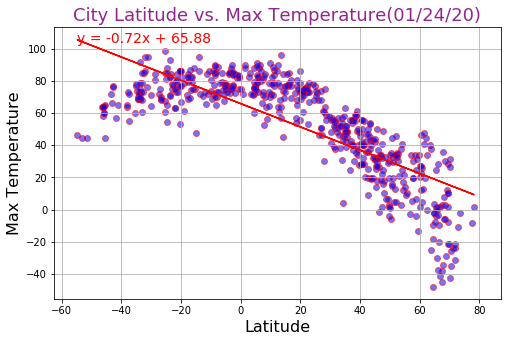

In [211]:
# Latitude vs. Temperature Plot
linearRegrassionPlot(weather_data['Lat'], weather_data['Max Temp'], f'City Latitude vs. Max Temperature({today_date})', 'Latitude', 'Max Temperature', 'City Latitude vs. Max Temperature')



Data Analysis:
There is a a strong negative correlation : -0.78. 
The plot shows a relationship between two variables whereby they move in opposite directions. Variables 'Latitude' and 'Max Temperature' have a negative correlation (or are negatively correlated), as 'Latitude' increases in value, 'Max Temperature' will decrease; similarly, if 'Latitude' decreases in value, 'Max Temperature' will increase. 
The weather becomes significantly warmer as one approaches the equator. The northern hemisphere tends to be colder this time of the year than the southern hemisphere.  


#### Latitude vs. Temperature Plot

The r-squared is: 0.1811293714164766
The equation of the regression line is: y = 0.11x + 72.41


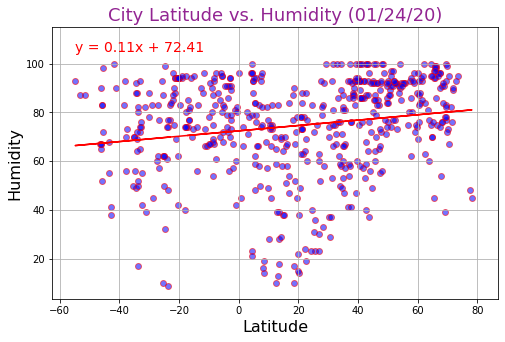

In [215]:
# Latitude vs. Humidity Plot
linearRegrassionPlot(weather_data['Lat'], weather_data['Humidity'], f'City Latitude vs. Humidity ({today_date})', 'Latitude', 'Humidity', 'City Latitude vs. Humidity')


Data Analysis: 
In the plot above, you can see that 'Latitude' and 'Humidity' have a weak positive correlation. 

#### Latitude vs. Humidity Plot

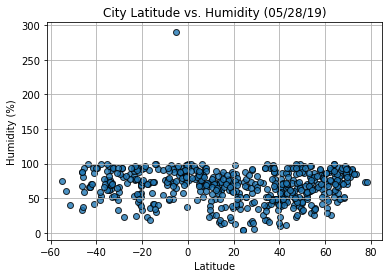

#### Latitude vs. Cloudiness Plot

The r-squared is: 0.17717003029806128
The equation of the regression line is: y = 0.2x + 54.72


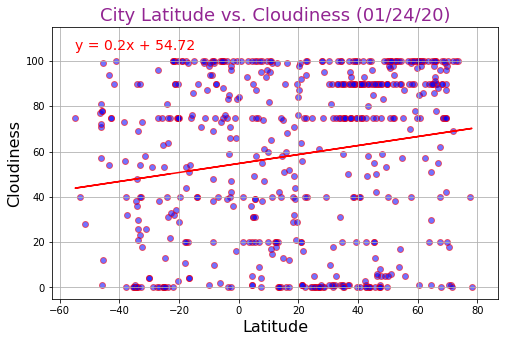

In [216]:
# Latitude vs. Cloudiness Plot
linearRegrassionPlot(weather_data['Lat'], weather_data['Cloudiness'], f'City Latitude vs. Cloudiness ({today_date})', 'Latitude', 'Cloudiness', 'City Latitude vs. Cloudiness')


Data Analysis: In the plot above, you can see that 'Latitude' and 'Cloudiness' have a weak positive correlation.

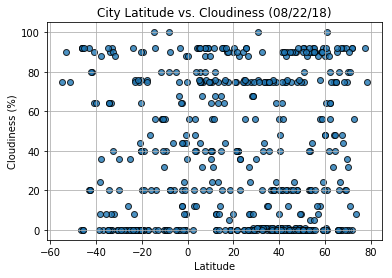

#### Latitude vs. Wind Speed Plot

The r-squared is: 0.01220645303585389
The equation of the regression line is: y = 0.0x + 8.25


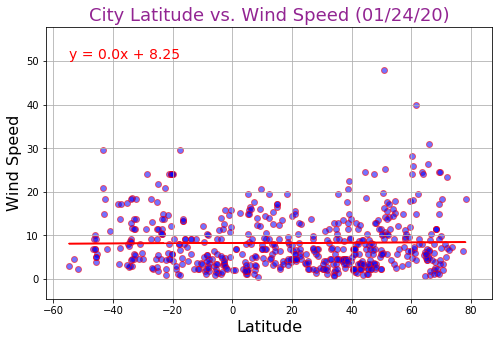

In [217]:
# Latitude vs. Wind Speed Plot
linearRegrassionPlot(weather_data['Lat'], weather_data['Wind Speed'], f'City Latitude vs. Wind Speed ({today_date})', 'Latitude', 'Wind Speed', 'City Latitude vs. Wind Speed')


Data Analysis: In the plot above, you can see that 'Latitude' and 'Wind Speed' have a weak positive correlation. Wind speed tends to generally be betweeen 0 and 20 mph regardless of latitude.


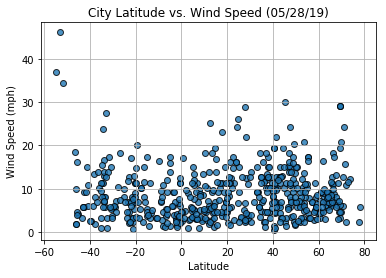

## Linear Regression

In [219]:
# Create Northern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data['Lat']>= 0]
print(northern_hemisphere.shape)
northern_hemisphere.head()

(383, 9)


,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Saint-Augustin,CA,6,1579935260,74,51.23,-58.65,4.91,10.83
4,Along,IN,0,1579935260,33,28.17,94.77,63.82,1.48
5,Los Llanos de Aridane,ES,0,1579935261,58,28.66,-17.92,59.00,6.93
7,Kiryat Gat,IL,75,1579935261,81,31.61,34.76,51.01,1.12
9,Shingu,JP,75,1579935261,62,33.73,135.98,51.80,3.36


In [220]:
# Create Southern Hemisphere DataFrames
southern_hemisphere = weather_data.loc[weather_data['Lat'] < 0]
print(southern_hemisphere.shape)
southern_hemisphere.head()

(174, 9)


,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,PF,22,1579934964,77,-23.12,-134.97,78.35,14.85
1,Ushuaia,AR,75,1579935224,93,-54.80,-68.30,46.40,3.02
3,Carnarvon,AU,0,1579934968,62,-24.87,113.63,87.80,21.92
6,Carutapera,BR,75,1579935185,81,-1.20,-46.02,81.95,14.58
8,Hithadhoo,MV,83,1579935095,80,-0.60,73.08,82.90,15.73


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8809722094757861
The equation of the regression line is: y = -1.36x + 92.87


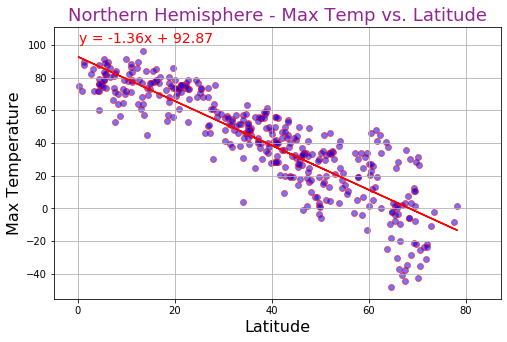

In [221]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
linearRegrassionPlot(northern_hemisphere['Lat'], northern_hemisphere['Max Temp'], 'Northern Hemisphere - Max Temp vs. Latitude', 'Latitude', 'Max Temperature', 'Northern Hemisphere - Max Temp vs. Latitude')


The r-squared is: -0.8151657406810827


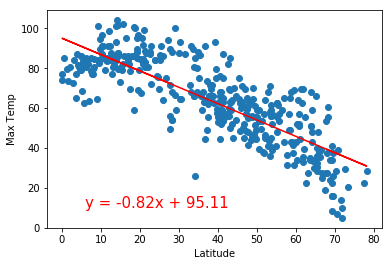

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4744849546634064
The equation of the regression line is: y = 0.35x + 82.62


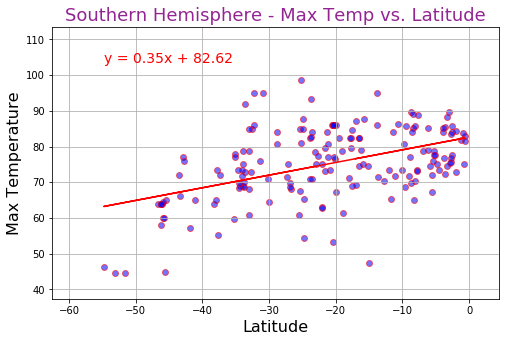

In [229]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
linearRegrassionPlot(southern_hemisphere['Lat'], southern_hemisphere['Max Temp'], 'Southern Hemisphere - Max Temp vs. Latitude', 'Latitude', 'Max Temperature', 'Southern Hemisphere - Max Temp vs. Latitude')


The r-squared is: 0.760263355051646


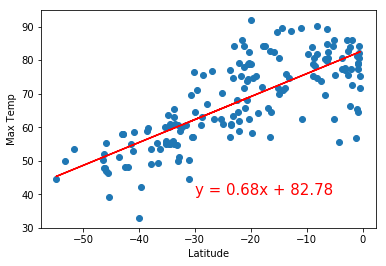

Data Analysis for Northern and Southern hemispheres - Max Temp vs. Latitude: There is a strong negative correlation  : -0.76 in Northern hemisphere and a moderate correlation in Southern(but we also have a lot less cities in the Southern hemispheres for this dataset)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3885967976466762
The equation of the regression line is: y = 0.41x + 58.84


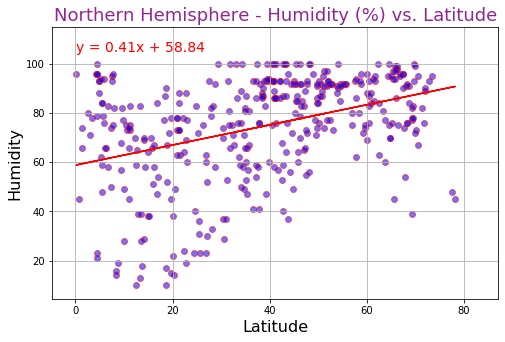

In [230]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
linearRegrassionPlot(northern_hemisphere['Lat'], northern_hemisphere['Humidity'], 'Northern Hemisphere - Humidity (%) vs. Latitude', 'Latitude', 'Humidity', 'Northern Hemisphere - Humidity (%) vs. Latitude')


The r-squared is: 0.10358336015746494


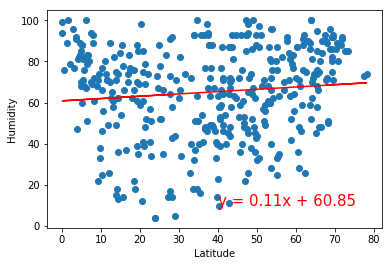

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17406053799200683
The equation of the regression line is: y = 0.22x + 79.63


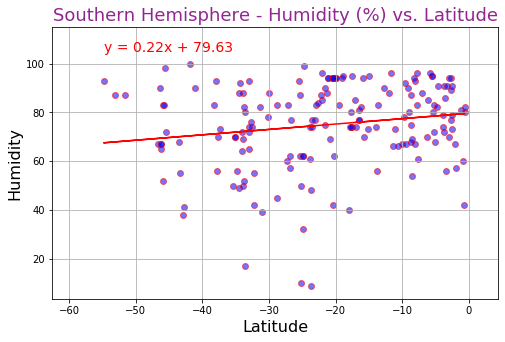

In [224]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
linearRegrassionPlot(southern_hemisphere['Lat'], southern_hemisphere['Humidity'], 'Southern Hemisphere - Humidity (%) vs. Latitude', 'Latitude', 'Humidity', 'Southern Hemisphere - Humidity (%) vs. Latitude')


The r-squared is: 0.14689473425583055


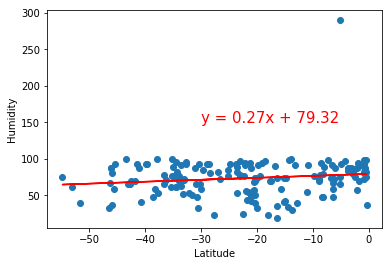

Data Analysis for Northern and Southern hemispheres - Humidity (%) vs. Latitude: There is a weak correlation for both hemispheres. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23864857893711358
The equation of the regression line is: y = 0.45x + 42.96


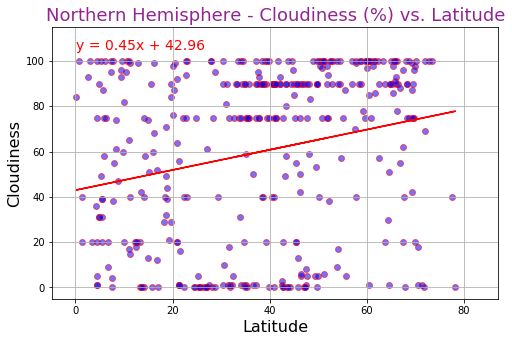

In [225]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
linearRegrassionPlot(northern_hemisphere['Lat'], northern_hemisphere['Cloudiness'], 'Northern Hemisphere - Cloudiness (%) vs. Latitude', 'Latitude', 'Cloudiness', 'Northern Hemisphere - Cloudiness (%) vs. Latitude')


The r-squared is: -0.08733547918934018


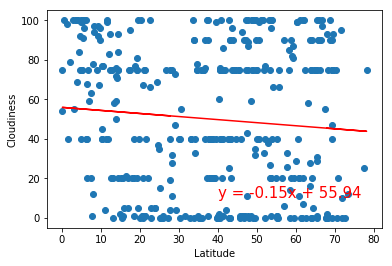

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2575997853454991
The equation of the regression line is: y = 0.67x + 69.95


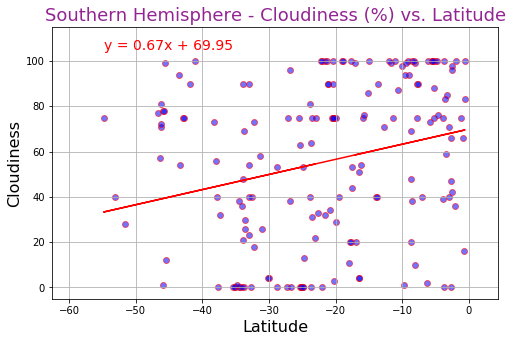

In [226]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
linearRegrassionPlot(southern_hemisphere['Lat'], southern_hemisphere['Cloudiness'], 'Southern Hemisphere - Cloudiness (%) vs. Latitude', 'Latitude', 'Cloudiness', 'Southern Hemisphere - Cloudiness (%) vs. Latitude')


The r-squared is: 0.21881426893991618


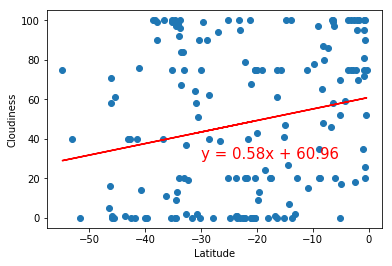

Data Analysis for Northern and Southern hemispheres - Humidity (%) vs. Latitude: There are a weak negative and weak correlation for both hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14597685075521888
The equation of the regression line is: y = 0.05x + 6.44


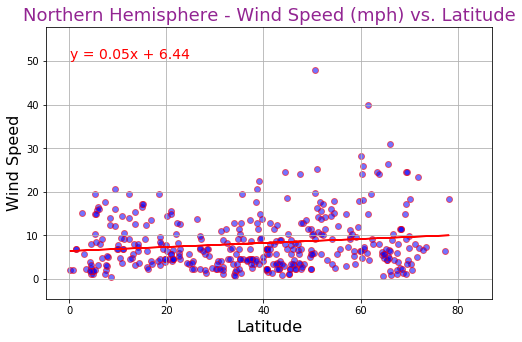

In [227]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
linearRegrassionPlot(northern_hemisphere['Lat'], northern_hemisphere['Wind Speed'], 'Northern Hemisphere - Wind Speed (mph) vs. Latitude', 'Latitude', 'Wind Speed', 'Northern Hemisphere - Wind Speed (mph) vs. Latitude')


The r-squared is: 0.1071382774388479


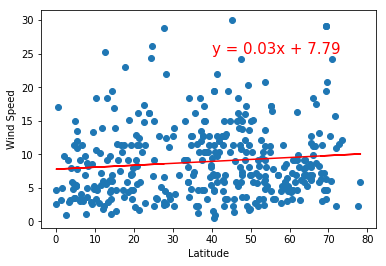

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.20629725674831037
The equation of the regression line is: y = -0.09x + 6.54


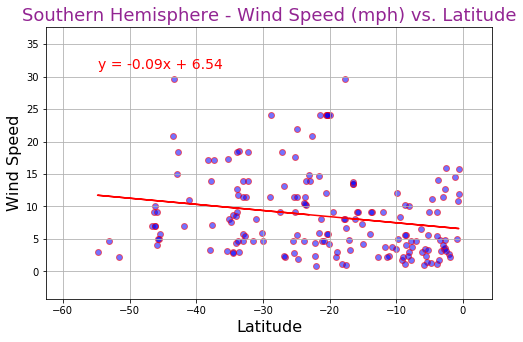

In [228]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
linearRegrassionPlot(southern_hemisphere['Lat'], southern_hemisphere['Wind Speed'], 'Southern Hemisphere - Wind Speed (mph) vs. Latitude', 'Latitude', 'Wind Speed', 'Southern Hemisphere - Wind Speed (mph) vs. Latitude')


The r-squared is: -0.322483077139538


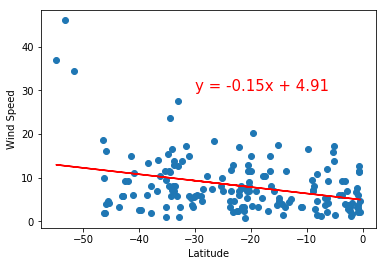

Data Analysis for Northern and Southern hemispheres - Wind Speed vs. Latitude: There are a weak positive and weak negative correlations for both hemispheres.